**IMPORTING REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

****Reading The Raw CSV File on Business Startups Data on SAAS products From Kaggle : https://www.kaggle.com/datasets/soumyadipbhat/business-startups-data-on-saas-products****

In [2]:
df_src = pd.read_csv("/content/saas-businesses-data.csv")

**FEATURE SELECTION & HANDLING MISSING VALUES**

In [3]:
df_src.drop("totalGrowthAnnual",axis=1,inplace=True)
df_src.drop("totalProfitAnnual",axis=1,inplace=True)

In [4]:
df_src["location"].fillna('United States', inplace=True)


**FEATURE ENGINEERING**

In [5]:
df_src['date'] = pd.to_datetime(df_src['date'], format='%d-%m-%Y', errors='coerce')
df_src['dateFounded'] = pd.to_datetime(df_src['dateFounded'], format='%d-%m-%Y', errors='coerce')

df_src['businessAge'] = (df_src['date'] - df_src['dateFounded']).dt.days / 365

df_src['businessAge'] = df_src['businessAge'].round()

In [6]:
df_src.drop(["date","dateFounded"],axis=1,inplace=True)

**CORRELATION MATRIX BETWEEN DIFFERENT FEATURES**

In [7]:
numeric_df_src = df_src.select_dtypes(include=[float, int])

correlation_matrix = numeric_df_src.corr()
print(correlation_matrix)

                    askingPrice  revenueMultiple  totalRevenueAnnual  \
askingPrice            1.000000         0.352326            0.752358   
revenueMultiple        0.352326         1.000000           -0.125715   
totalRevenueAnnual     0.752358        -0.125715            1.000000   
team                   0.429353        -0.035217            0.472897   
revenue                0.712734        -0.020224            0.875360   
annualProfit           0.513903         0.001394            0.679696   
growthAnnual          -0.044299        -0.061004           -0.048931   
weeklyViews            0.435231        -0.005366            0.498910   
businessAge            0.111853        -0.072386            0.128361   

                        team   revenue  annualProfit  growthAnnual  \
askingPrice         0.429353  0.712734      0.513903     -0.044299   
revenueMultiple    -0.035217 -0.020224      0.001394     -0.061004   
totalRevenueAnnual  0.472897  0.875360      0.679696     -0.048931   

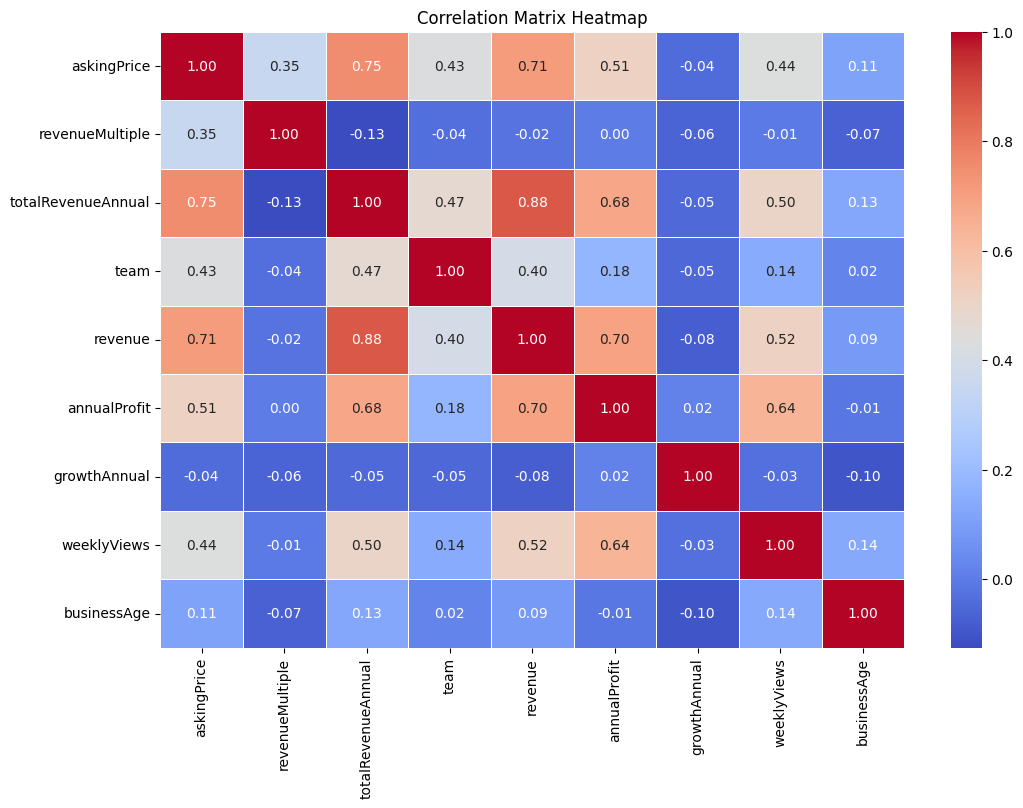

In [8]:
plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()


In [9]:
df_src.columns

Index(['askingPrice', 'revenueMultiple', 'listingType', 'totalRevenueAnnual',
       'location', 'team', 'revenue', 'customers', 'keywords', 'annualProfit',
       'growthAnnual', 'techStack', 'weeklyViews', 'businessAge'],
      dtype='object')

**SYNTHETIC DATA GENERATION TO SCALE UP DATA POINTS BY CTGAN MODEL**

**DATA IS SCALED FROM 126 DATA POINTS TO 1000 DATA POINTS TO HELP MODEL LEARN THE PATTERNS EFFECTIVELY & CONVERGE BETTER**

**INSTALLING REQUIRED PACKAGES FOR CTGAN**

In [10]:
!pip install ctgan
!pip install table_evaluator
!pip install dython

In [11]:
!pip install scipy==1.11.4

**LISTING ALL THE CATEGORICAL VALUES**

In [12]:
categorical_features = ['location','keywords','techStack','customers','listingType','team']

**TRAINING THE CTGAN MODEL FOR DATA GENERATION**

In [14]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(df_src, categorical_features, epochs = 40000)

Gen. (0.00) | Discrim. (0.00):   0%|          | 0/40000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:768: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Gen. (-0.29) | Discrim. (-0.25): 100%|██████████| 40000/40000 [25:24<00:00, 26.24it/s]


**GENERATING 10000 SAMPLES FROM THE TRAINED MODEL**

In [15]:
samples = ctgan.sample(10000)
samples

,askingPrice,revenueMultiple,listingType,totalRevenueAnnual,location,team,revenue,customers,keywords,annualProfit,growthAnnual,techStack,weeklyViews,businessAge
0,991429,6.035415,premium,351310,Canada,2,1.563829e+05,10-100,Automation,-90024,-81.014970,Cloud,4,2.355508
1,19961086,3.446229,platinum,1758476,United States,5,3.644856e+06,10-100,Entertainment,636375,187.528528,FullStack,22,8.215153
2,7786323,5.293701,platinum,1987851,United States,31,2.730640e+06,1000-10000,Finance,1801844,-127.530209,DBMS,34,2.692039
3,1505549,5.281511,platinum,526109,Mexico,2,4.389125e+05,100-1000,HealthCare,55140,50.663703,FullStack and Cloud,7,2.556330
4,3238324,4.091688,platinum,657309,United States,6,4.221076e+05,10000-100000,Management,51051,-225.445411,BackEnd,4,13.954761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3173062,4.007496,platinum,565285,United States,2,5.303650e+05,1000-10000,Web Tools,310789,-50.062421,FrontEnd and Cloud,13,-0.122810
9996,1009109,4.288214,platinum,527219,Ukraine,11,7.437871e+04,more than 100000,SEO,198251,14.155052,FullStack and DBMS,7,9.296358
9997,2150280,5.479222,platinum,526598,United States,4,3.187151e+05,10000-100000,Management,60593,-145.362283,BackEnd,9,7.103101
9998,1940705,4.401697,platinum,658524,United States,3,4.388300e+05,10-100,Analytics,191481,-80.813638,BackEnd and Cloud,8,4.345431


**COORELATION AMONG THE FEATURES OF SYNTHETIC DATA GENERATED TO FIND IF MODEL GENERATES SAME TYPE OF DATA AS ORIGINAL**

In [16]:

numeric_df_src = samples.select_dtypes(include=[float, int])

correlation_matrix = numeric_df_src.corr()
print(correlation_matrix)

                    askingPrice  revenueMultiple  totalRevenueAnnual  \
askingPrice            1.000000         0.297577            0.645253   
revenueMultiple        0.297577         1.000000           -0.098489   
totalRevenueAnnual     0.645253        -0.098489            1.000000   
team                   0.338721        -0.030136            0.421293   
revenue                0.656796        -0.002819            0.811893   
annualProfit           0.504085         0.056263            0.622512   
growthAnnual          -0.029608        -0.008640           -0.039612   
weeklyViews            0.517104         0.092085            0.488572   
businessAge            0.083329        -0.101865            0.084216   

                        team   revenue  annualProfit  growthAnnual  \
askingPrice         0.338721  0.656796      0.504085     -0.029608   
revenueMultiple    -0.030136 -0.002819      0.056263     -0.008640   
totalRevenueAnnual  0.421293  0.811893      0.622512     -0.039612   

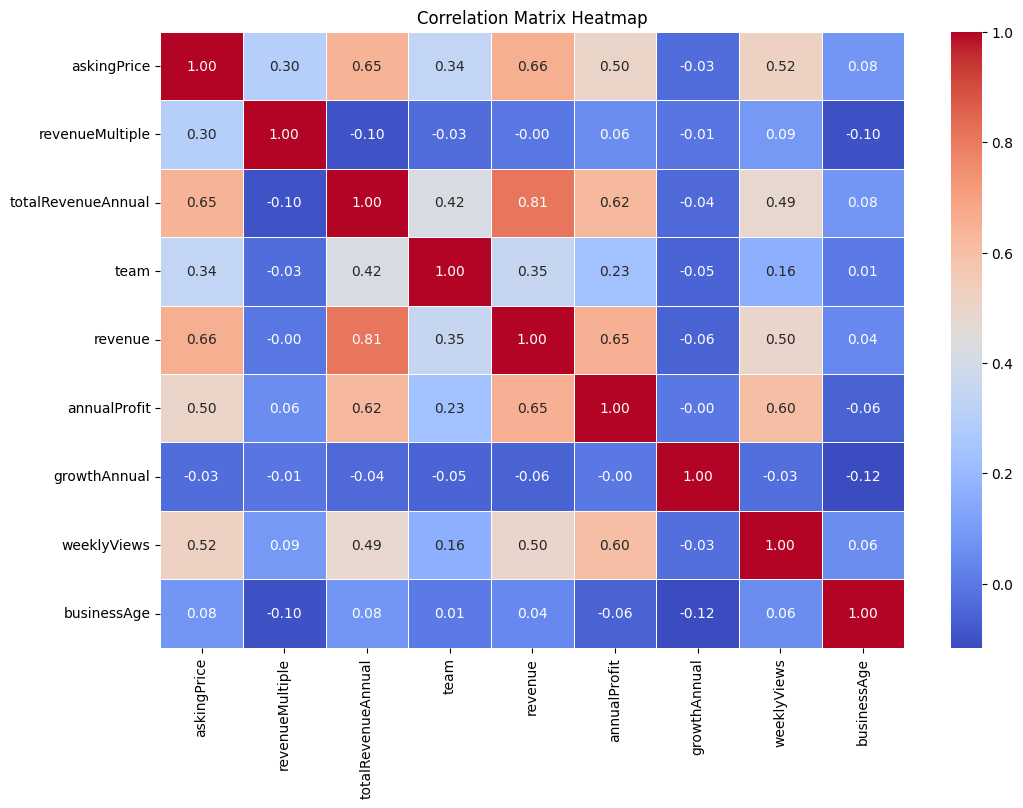

In [17]:
plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

(126, 14) (10000, 14)


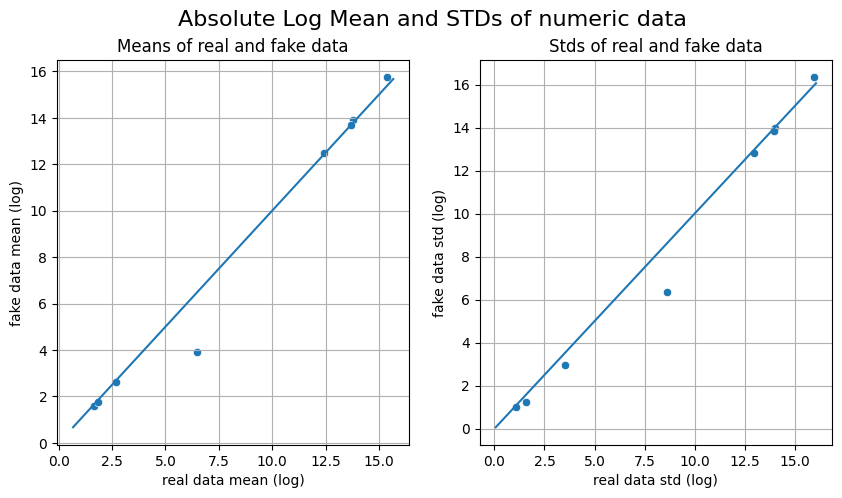

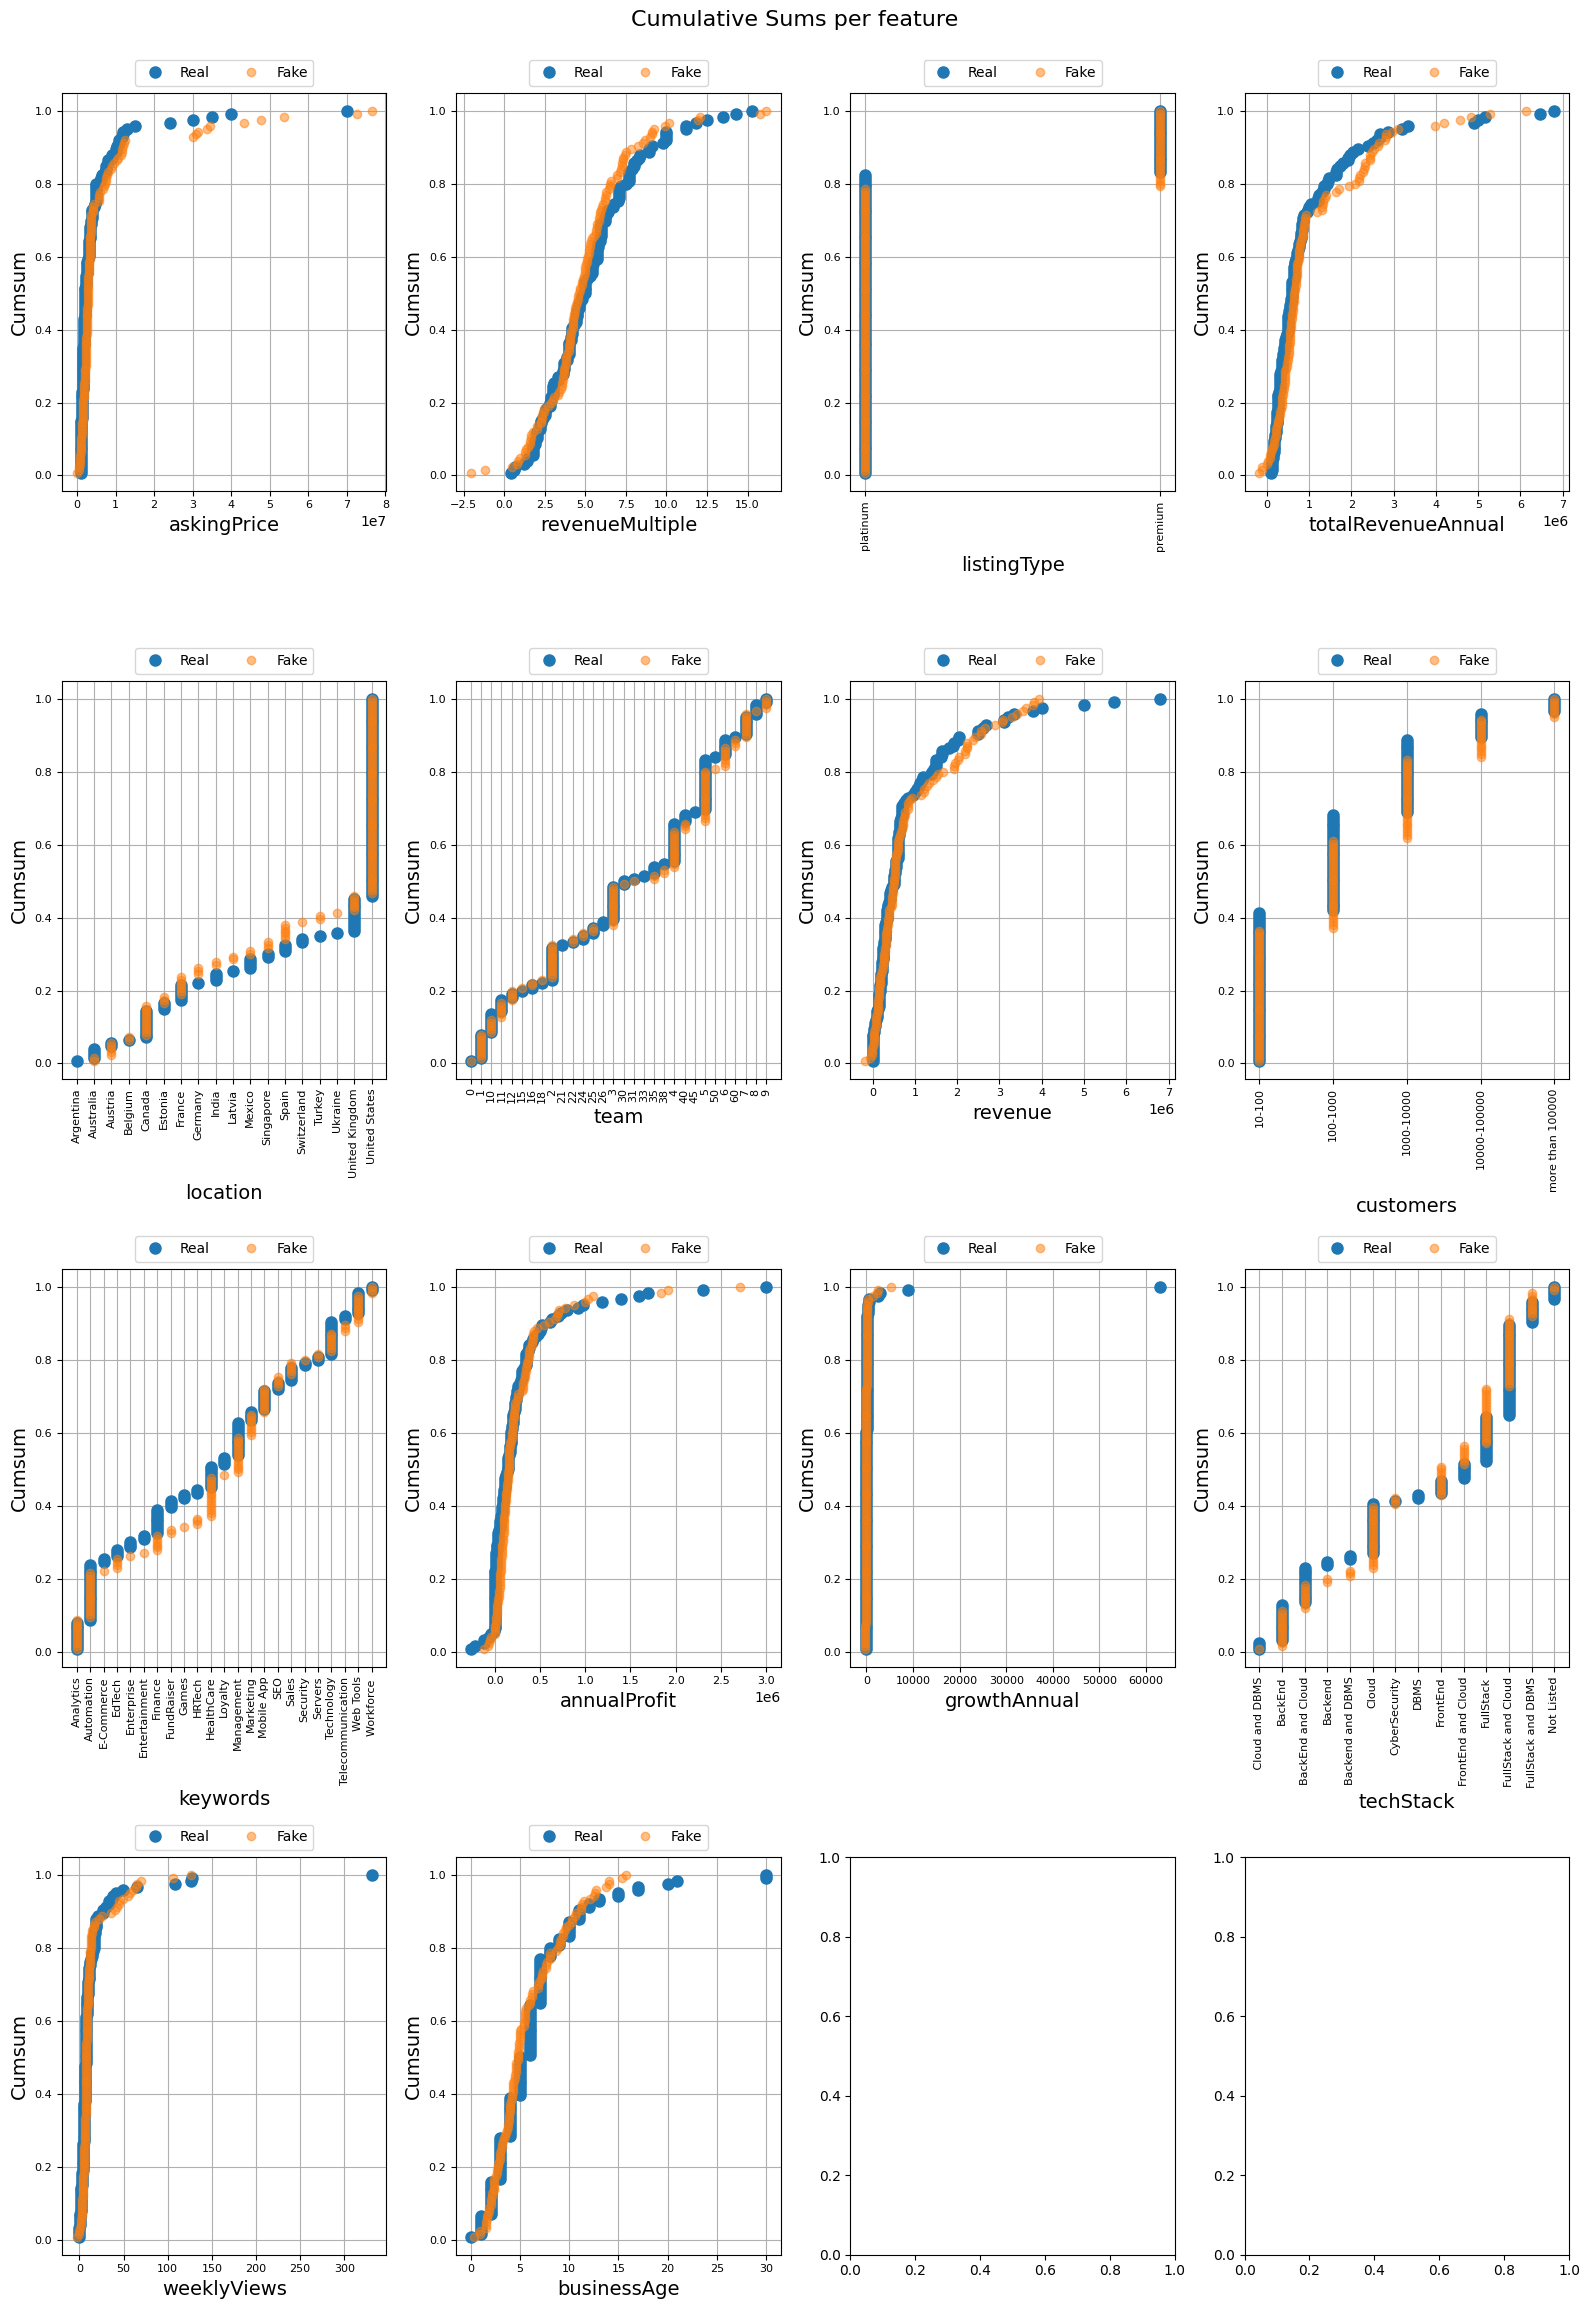

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:246: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation="vertical")
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:246: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation="vertical")
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:246: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation="vertical")
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:246: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. afte

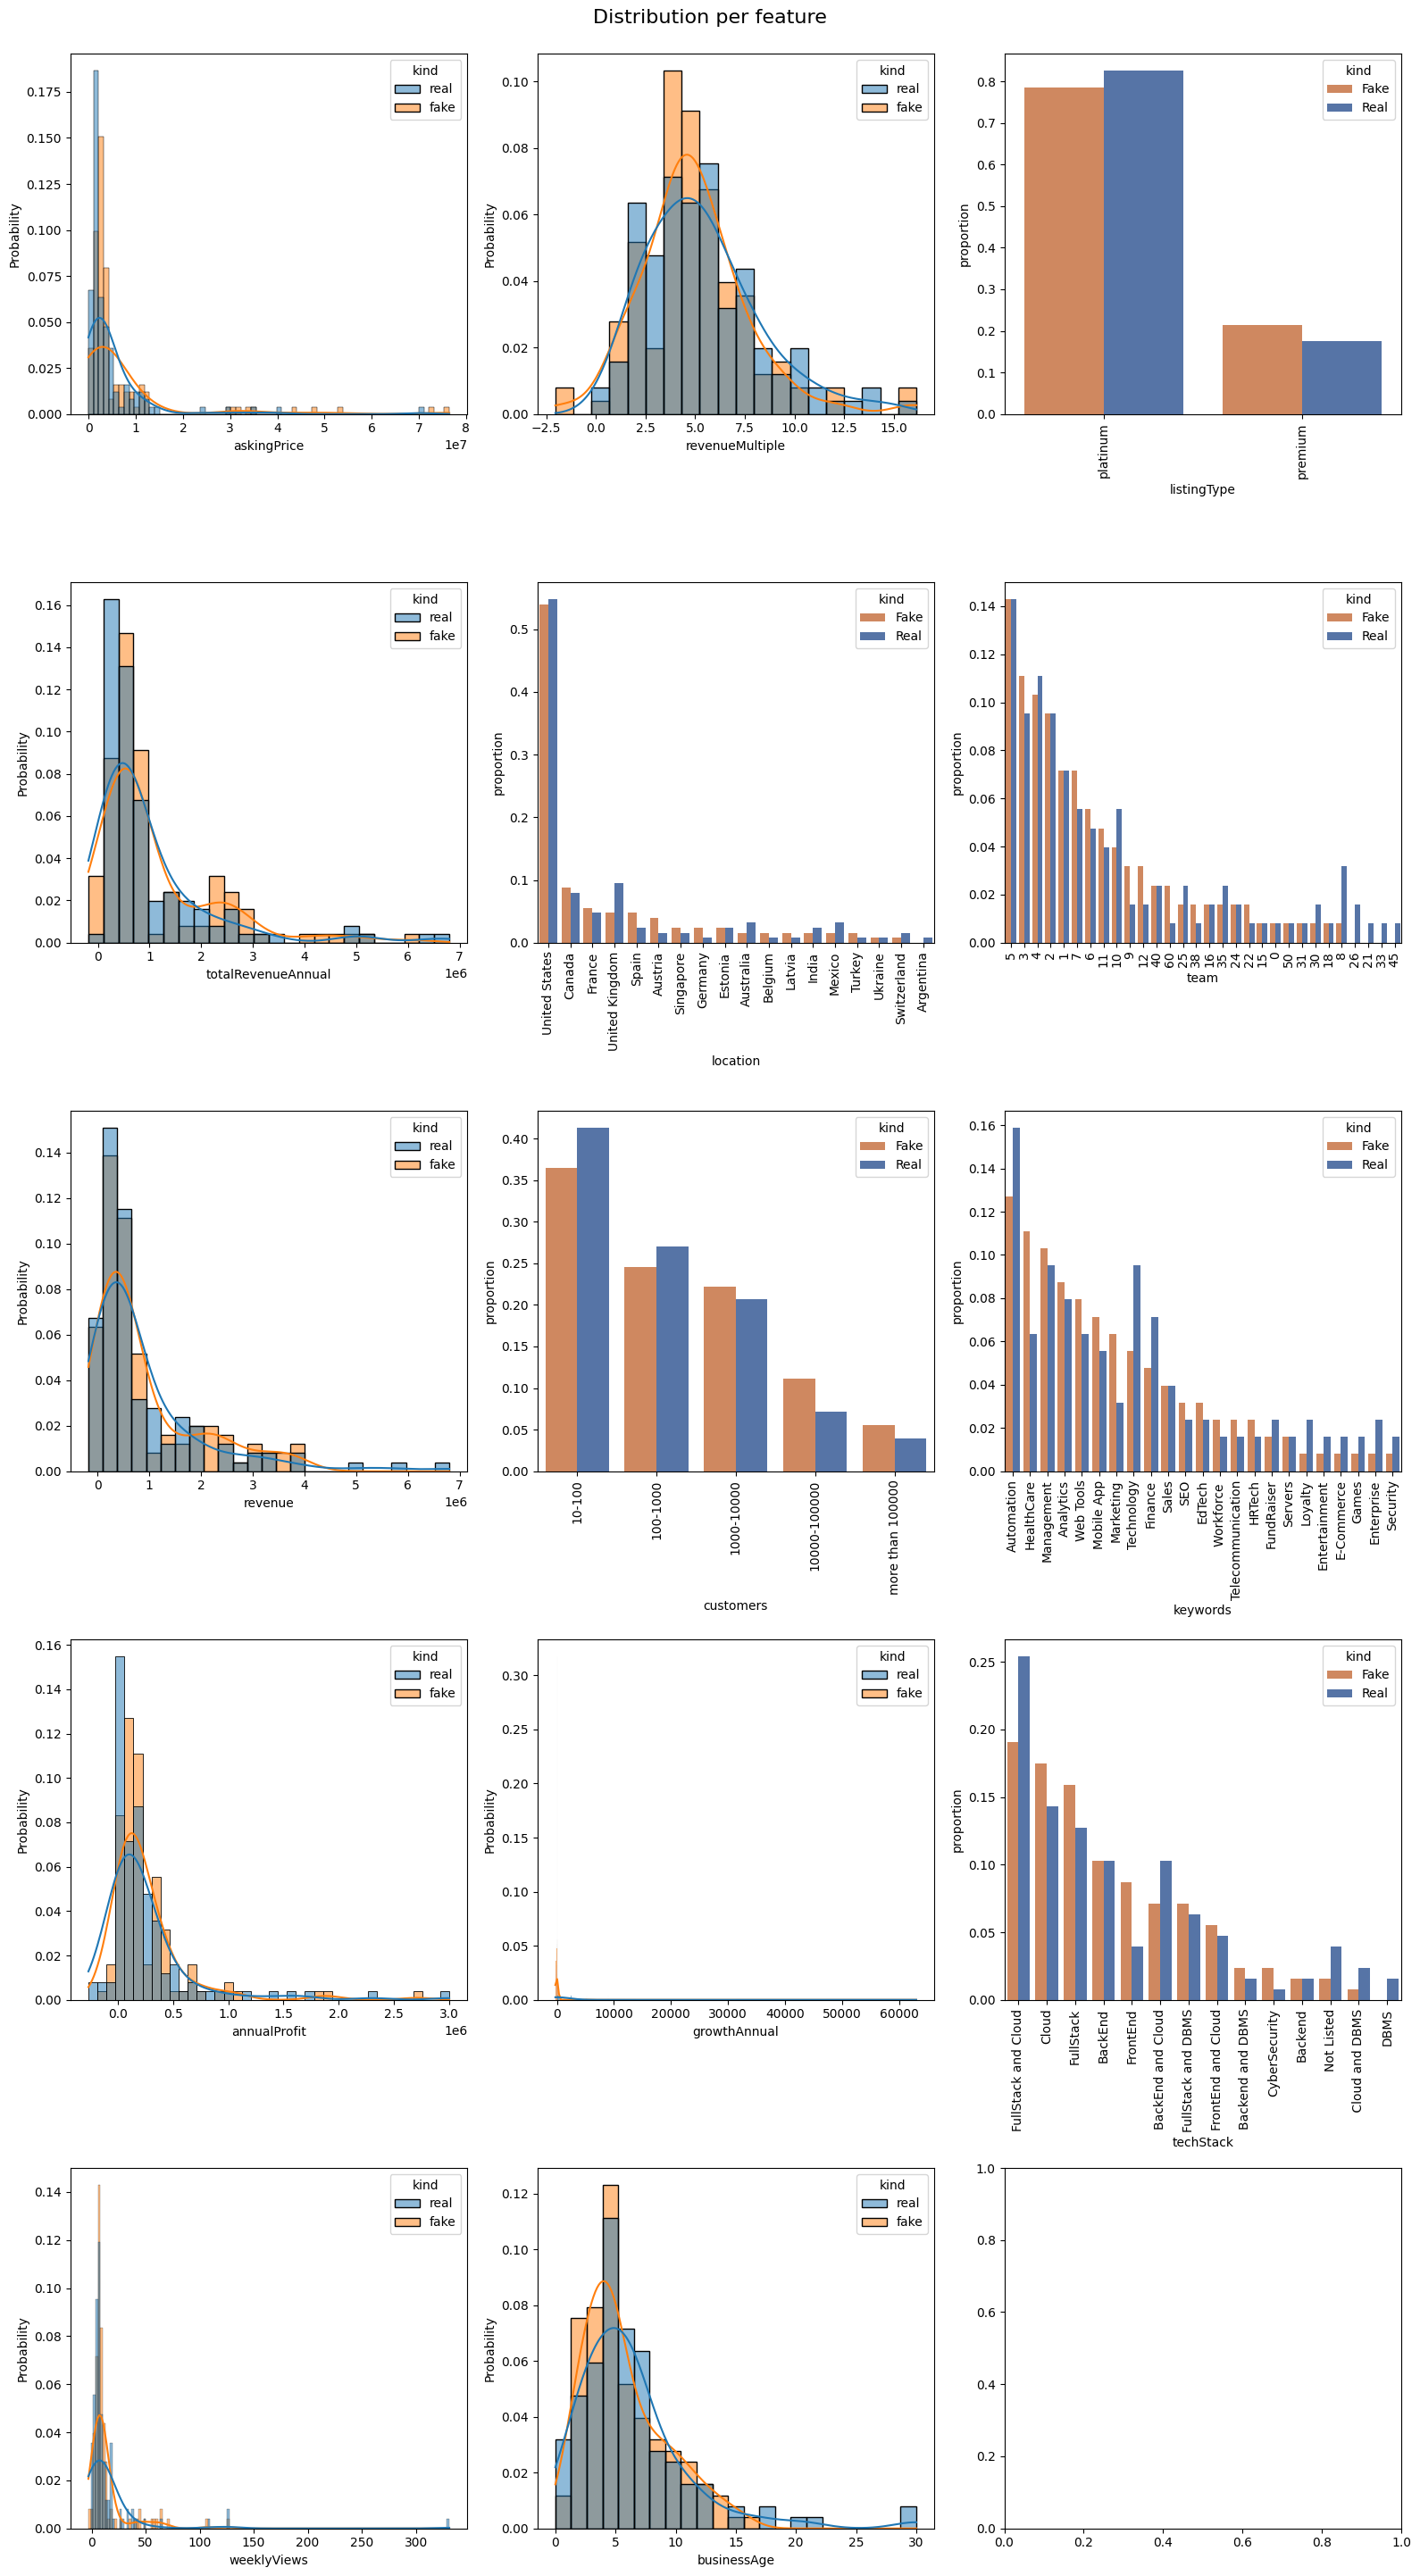

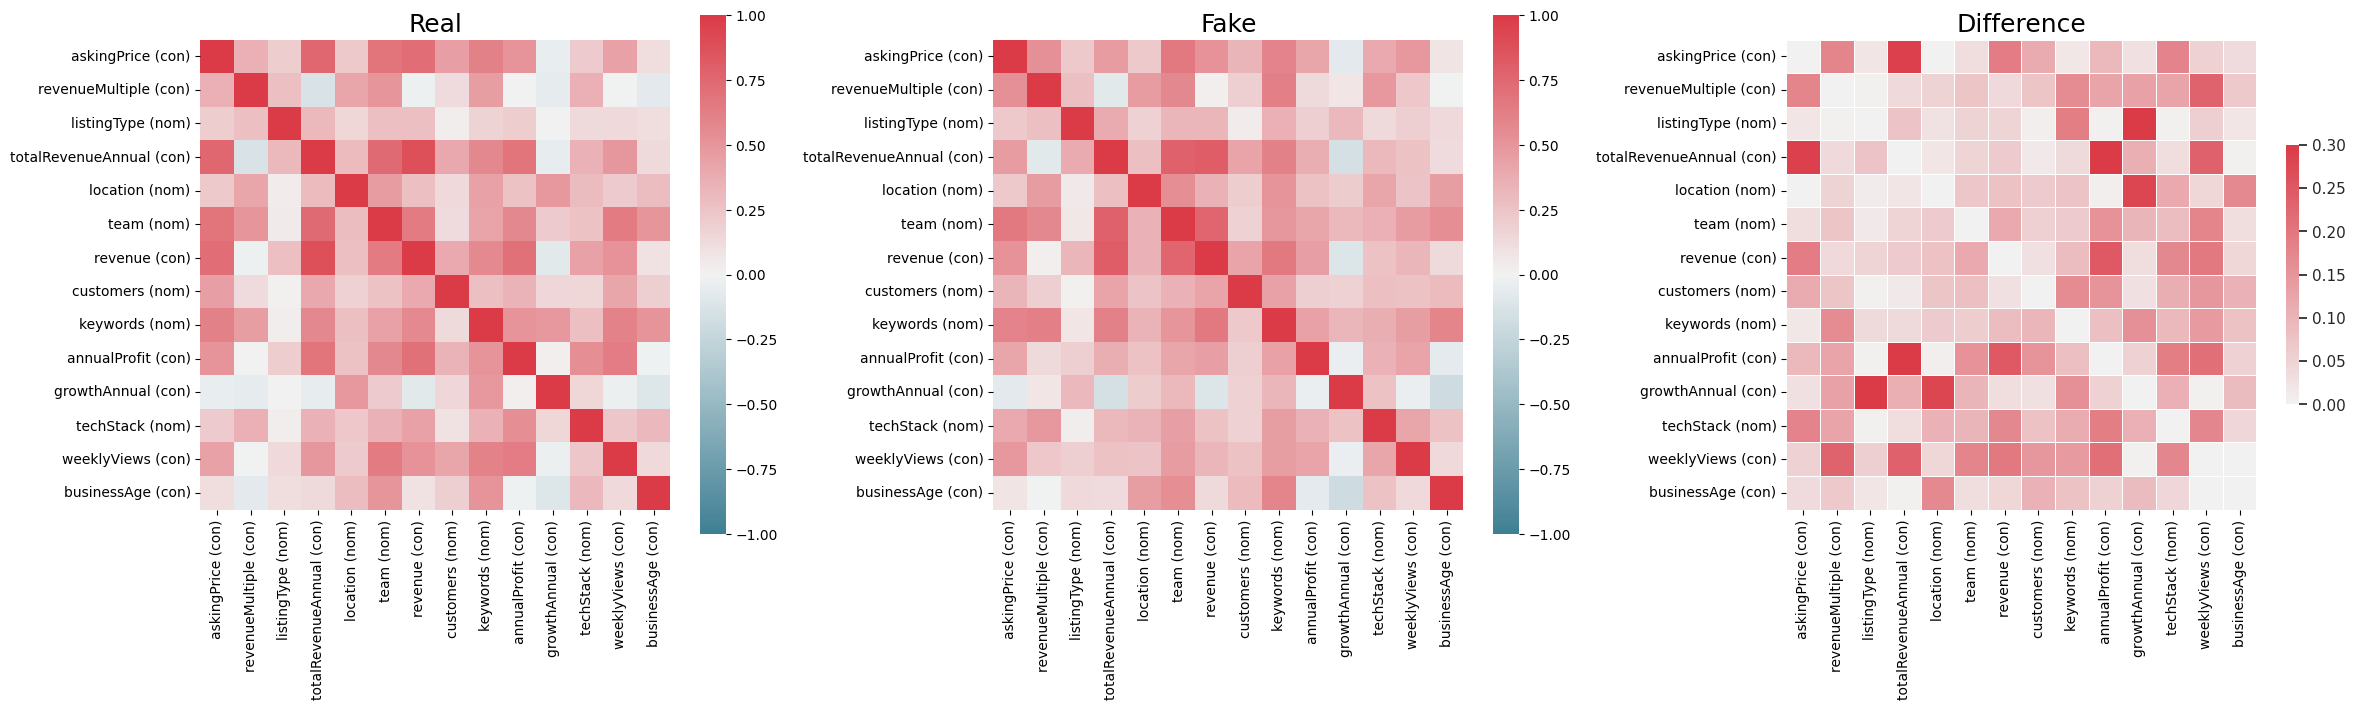

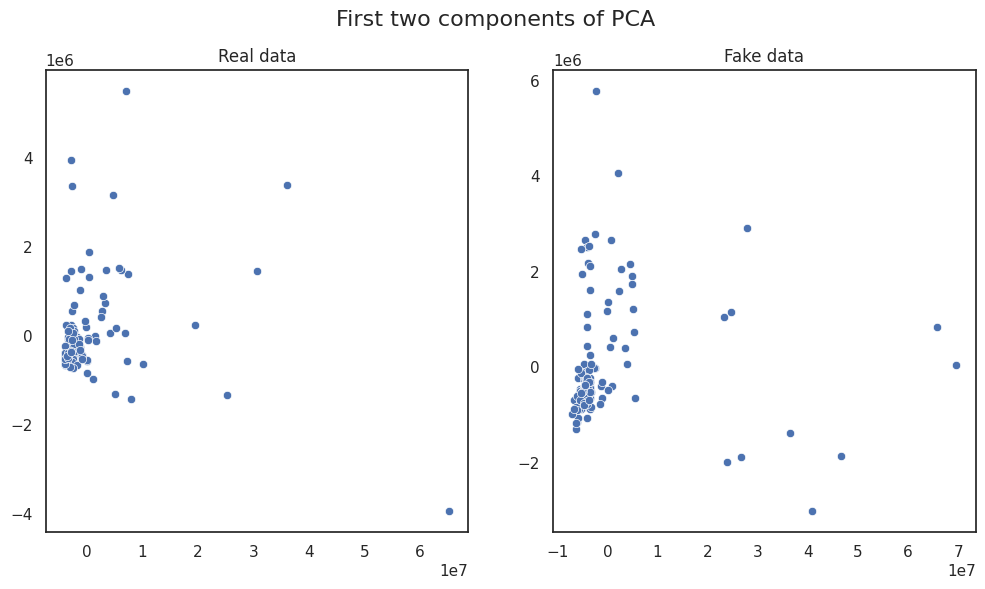

In [18]:
from table_evaluator import TableEvaluator

print(df_src.shape, samples.shape)
table_evaluator =  TableEvaluator(df_src, samples, cat_cols= categorical_features)

table_evaluator.visual_evaluation()

**CONVERTING THE NEGETIVE VALUES FROM FEATURE COLUMNS WHEREEVER RELAVANT**

In [19]:
import pandas as pd

def convert_negatives_to_positive(df, columns):
    """
    Convert negative values to positive in the specified columns of a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): A list of column names to check for negative values.

    Returns:
    pd.DataFrame: The modified DataFrame with negative values converted to positive.
    """
    for column in columns:
        if column in df.columns:
            df[column] = df[column].abs()
        else:
            print(f"Column '{column}' does not exist in the DataFrame.")

    return df



columns_to_check = ['askingPrice', 'revenueMultiple', 'totalRevenueAnnual', 'team', 'revenue', 'growthAnnual', 'weeklyViews','businessAge']

df_pos = convert_negatives_to_positive(samples, columns_to_check)

df_pos


,askingPrice,revenueMultiple,listingType,totalRevenueAnnual,location,team,revenue,customers,keywords,annualProfit,growthAnnual,techStack,weeklyViews,businessAge
0,991429,6.035415,premium,351310,Canada,2,1.563829e+05,10-100,Automation,-90024,81.014970,Cloud,4,2.355508
1,19961086,3.446229,platinum,1758476,United States,5,3.644856e+06,10-100,Entertainment,636375,187.528528,FullStack,22,8.215153
2,7786323,5.293701,platinum,1987851,United States,31,2.730640e+06,1000-10000,Finance,1801844,127.530209,DBMS,34,2.692039
3,1505549,5.281511,platinum,526109,Mexico,2,4.389125e+05,100-1000,HealthCare,55140,50.663703,FullStack and Cloud,7,2.556330
4,3238324,4.091688,platinum,657309,United States,6,4.221076e+05,10000-100000,Management,51051,225.445411,BackEnd,4,13.954761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3173062,4.007496,platinum,565285,United States,2,5.303650e+05,1000-10000,Web Tools,310789,50.062421,FrontEnd and Cloud,13,0.122810
9996,1009109,4.288214,platinum,527219,Ukraine,11,7.437871e+04,more than 100000,SEO,198251,14.155052,FullStack and DBMS,7,9.296358
9997,2150280,5.479222,platinum,526598,United States,4,3.187151e+05,10000-100000,Management,60593,145.362283,BackEnd,9,7.103101
9998,1940705,4.401697,platinum,658524,United States,3,4.388300e+05,10-100,Analytics,191481,80.813638,BackEnd and Cloud,8,4.345431


**REMOVING THE OUTLIERS FROM THE SYNTHETIC DATA GENERATED TO HELP MODEL REDUCE MAPE & RMSE**

In [20]:
numeric_cols = df_pos.select_dtypes(include=[np.number]).columns  # Select only numeric columns
Q1 = df_pos[numeric_cols].quantile(0.25)
Q3 = df_pos[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = 1.5

df_no_outliers = df_pos[~((df_pos[numeric_cols] < (Q1 - outlier_threshold * IQR)) | (df_pos[numeric_cols] > (Q3 + outlier_threshold * IQR))).any(axis=1)]

print(f"Original data size: {df_pos.shape}")
print(f"Data size after removing outliers: {df_no_outliers.shape}")

Original data size: (10000, 14)
Data size after removing outliers: (5693, 14)


**CORRELATION MATRIX OF FEATURES AFTER REMOVING REMOVING OUTLIERS**

In [21]:
numeric_df_src = df_no_outliers.select_dtypes(include=[float, int])

correlation_matrix = numeric_df_src.corr()
print(correlation_matrix)

                    askingPrice  revenueMultiple  totalRevenueAnnual  \
askingPrice            1.000000         0.042223            0.406543   
revenueMultiple        0.042223         1.000000           -0.479415   
totalRevenueAnnual     0.406543        -0.479415            1.000000   
team                   0.223624        -0.175793            0.221136   
revenue                0.346033        -0.316150            0.634115   
annualProfit           0.126113        -0.001032            0.076613   
growthAnnual           0.010871         0.026497           -0.002690   
weeklyViews            0.151802        -0.141199            0.128609   
businessAge            0.055639        -0.094010            0.094684   

                        team   revenue  annualProfit  growthAnnual  \
askingPrice         0.223624  0.346033      0.126113      0.010871   
revenueMultiple    -0.175793 -0.316150     -0.001032      0.026497   
totalRevenueAnnual  0.221136  0.634115      0.076613     -0.002690   

In [22]:
df_no_outliers['techStack'] = df_no_outliers['techStack'].replace('Backend', 'BackEnd')

<ipython-input-22-93b5ad6abfbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['techStack'] = df_no_outliers['techStack'].replace('Backend', 'BackEnd')


**AS THERE IS NO SIGNIFICANT LINEAR RELATIONSHIP IN THE PRESENT DATA WE OPT FOR MODELS WHICH CAN LEARN NON-LINEARITY IN THE DATA AND GENERALISE BETTER.**

**WE OPT FOR XGBOOST MODEL FOR ITS ABILITY TO CAPTURE NON-LINEARITY IN THE DATA BETTER**

**NECESSARY IMPORTS FOR MODEL TRAINING**

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_percentage_error

**ENCODING CATEGORICAL FEATURES WITH ONE-HOT ENCODING**

In [24]:
categorical_features = ['location', 'keywords', 'techStack', 'listingType', 'customers']
df_encoded = pd.get_dummies(df_no_outliers, columns=categorical_features)


**PROCESSING THE DATA & INITIALIZING THE XGBOOST MODEL**

In [25]:
y = df_encoded['askingPrice']
X = df_encoded.drop('askingPrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(
    n_estimators=500,  # Number of trees
    learning_rate=0.05,
    max_depth=6,  # Maximum depth of trees
    subsample=0.8,  # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    random_state=42  # Random seed for reproducibility
)

**Performing CROSS VALIDATION ON OUR DATASET BY K-FOLD CROSS-VALIDATION TO FINE TUNE HYPER PARAMETERS**

In [26]:
def mape_scorer(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='r2')
mape_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring=make_scorer(mape_scorer, greater_is_better=False))

mse_scores = -mse_scores
mape_scores = -mape_scores

print(f"Cross-Validation Mean Squared Error Scores: {mse_scores}")
print(f"Average Cross-Validation MSE: {mse_scores.mean():.4f}")
print(f"Average Cross-Validation RMSE: {np.sqrt(mse_scores.mean()):.4f}")
print(f"Cross-Validation R-squared Scores: {r2_scores}")
print(f"Average Cross-Validation R-squared: {r2_scores.mean():.4f}")
print(f"Cross-Validation MAPE Scores: {mape_scores}")
print(f"Average Cross-Validation MAPE: {mape_scores.mean():.4f}")

Cross-Validation Mean Squared Error Scores: [7.54730664e+11 8.50976659e+11 6.72084734e+11 6.95402010e+11
 8.10853077e+11]
Average Cross-Validation MSE: 756809428859.6038
Average Cross-Validation RMSE: 869947.9461
Cross-Validation R-squared Scores: [0.62165523 0.63382959 0.66964591 0.66160393 0.66866946]
Average Cross-Validation R-squared: 0.6511
Cross-Validation MAPE Scores: [0.37765744 0.46970259 0.46851886 0.5414381  0.34382729]
Average Cross-Validation MAPE: 0.4402


**TRAINING THE MODEL ON THE COMPLETE TRAINING SET WITH FINE TUNED PARAMETERS & EVALUATING THE MODEL ON TEST SET**

In [27]:

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"\nTest Data Mean Squared Error: {mse:.4f}")
print(f"Test Data R-squared: {r2:.4f}")
print(f"Test Data Root Mean Squared Error: {rmse:.4f}")
print(f"Test Data Mean Absolute Percentage Error: {mape:.4f}")



Test Data Mean Squared Error: 688949042502.6558
Test Data R-squared: 0.6306
Test Data Root Mean Squared Error: 830029.5432
Test Data Mean Absolute Percentage Error: 0.3926


**Save The Model**

In [28]:
import joblib
joblib.dump(xgb_model, 'saas_price_predictor_xgb.pkl')

['saas_price_predictor_xgb.pkl']